# Earthquake dataset

**We will create a machine learning model to predict the magnitude of an earthquake**

#### Importing the required libraries

In [165]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

#### Reading the dataset

In [105]:
df = pd.read_csv('Earthquake.csv')

In [106]:
df.head(10)

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,1/2/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,1/4/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,1/5/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,1/8/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,1/9/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
5,1/10/1965,13:36:32,-13.405,166.629,Earthquake,35.0,NaN,NaN,6.7,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860922,ISCGEM,ISCGEM,ISCGEM,Automatic
6,1/12/1965,13:32:25,27.357,87.867,Earthquake,20.0,NaN,NaN,5.9,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM861007,ISCGEM,ISCGEM,ISCGEM,Automatic
7,1/15/1965,23:17:42,-13.309,166.212,Earthquake,35.0,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM861111,ISCGEM,ISCGEM,ISCGEM,Automatic
8,1/16/1965,11:32:37,-56.452,-27.043,Earthquake,95.0,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEMSUP861125,ISCGEMSUP,ISCGEM,ISCGEM,Automatic
9,1/17/1965,10:43:17,-24.563,178.487,Earthquake,565.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM861148,ISCGEM,ISCGEM,ISCGEM,Automatic


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

*The dataset has **9 categorical columns** and **12 numerical columns**. Some columns have missing values. The shape of the dataframe shows that there 23412 rows in the dataset and 21 columns/features*

In [108]:
df.describe()

,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square
count,23412.000000,23412.000000,23412.000000,4461.000000,7097.000000,23412.000000,327.000000,2564.000000,7299.000000,1604.000000,1156.000000,17352.000000
mean,1.679033,39.639961,70.767911,4.993115,275.364098,5.882531,0.071820,48.944618,44.163532,3.992660,7.662759,1.022784
std,30.113183,125.511959,122.651898,4.875184,162.141631,0.423066,0.051466,62.943106,32.141486,5.377262,10.430396,0.188545
min,-77.080000,-179.997000,-1.100000,0.000000,0.000000,5.500000,0.000000,0.000000,0.000000,0.004505,0.085000,0.000000
25%,-18.653000,-76.349750,14.522500,1.800000,146.000000,5.600000,0.046000,10.000000,24.100000,0.968750,5.300000,0.900000
50%,-3.568500,103.982000,33.000000,3.500000,255.000000,5.700000,0.059000,28.000000,36.000000,2.319500,6.700000,1.000000
75%,26.190750,145.026250,54.000000,6.300000,384.000000,6.000000,0.075500,66.000000,54.000000,4.724500,8.100000,1.130000
max,86.005000,179.998000,700.000000,91.295000,934.000000,9.100000,0.410000,821.000000,360.000000,37.874000,99.000000,3.440000


During the training phase, the ML model should know only about the training data. But if the model gets to know about the test data during the training phase, then this is called data leakage.

So we should perform splitting of the dataset before applying feature engineering. After splitting, we will first apply feature engineering for the training data and then apply it on to the test data. This will help to reduce data leakage and overfitting.

But presence of duplicates can also cause data leakage. Therefore, we will first remove the duplicate records from the dataset and then perform train test split

#### Now we will check for duplicates

In [109]:
df.duplicated().sum()

0

*There are no duplicate rows*

#### Splitting the dataset into training and testing datasets

In [110]:
X = df.drop(columns=["Magnitude"], axis=1)
Y = df.Magnitude

In [111]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42, shuffle=True)

Joining the training dataframe

In [112]:
df_train = X_train.join(y_train, how='inner')

Joining the testing dataframe

In [113]:
df_test = X_test.join(y_test, how='inner')

Resetting the indices for the training and test dataframes

In [114]:
df_train.reset_index(inplace = True, drop = True)

In [115]:
df_test.reset_index(inplace = True, drop = True)

The indices have been reset in the training and testing dataframes

In [116]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16388 entries, 0 to 16387
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        16388 non-null  object 
 1   Time                        16388 non-null  object 
 2   Latitude                    16388 non-null  float64
 3   Longitude                   16388 non-null  float64
 4   Type                        16388 non-null  object 
 5   Depth                       16388 non-null  float64
 6   Depth Error                 3132 non-null   float64
 7   Depth Seismic Stations      4960 non-null   float64
 8   Magnitude Type              16387 non-null  object 
 9   Magnitude Error             247 non-null    float64
 10  Magnitude Seismic Stations  1806 non-null   float64
 11  Azimuthal Gap               5131 non-null   float64
 12  Horizontal Distance         1145 non-null   float64
 13  Horizontal Error            827

In [117]:
df_train.isnull().sum()

Date                              0
Time                              0
Latitude                          0
Longitude                         0
Type                              0
Depth                             0
Depth Error                   13256
Depth Seismic Stations        11428
Magnitude Type                    1
Magnitude Error               16141
Magnitude Seismic Stations    14582
Azimuthal Gap                 11257
Horizontal Distance           15243
Horizontal Error              15561
Root Mean Square               4266
ID                                0
Source                            0
Location Source                   0
Magnitude Source                  0
Status                            0
Magnitude                         0
dtype: int64

*There are high number of **missing values** in the columns **Depth Error**, **Depth Seismic Stations**, **Magnitude Error**, **Magnitude Seismic Stations**, **Azimuthal Gap**, **Horizontal Distance** and **Horizontal Error**. We can drop these columns as they large number of missing values. For **Root Mean Square** column, we can replace the missing values with mean/median value*

In [118]:
df_train = df_train.drop(['Depth Error', 'Depth Seismic Stations', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error'], axis=1)

In [119]:
df_train = df_train.dropna(subset=['Magnitude Type'])

*We have dropped the rows corresponding to the 3 missing values in the column **Magnitude Type**. For the remaining column with missing values, we will impute the them with **mean/median** depending upon the distribution*

In [120]:
df_train.isnull().sum()

Date                   0
Time                   0
Latitude               0
Longitude              0
Type                   0
Depth                  0
Magnitude Type         0
Root Mean Square    4265
ID                     0
Source                 0
Location Source        0
Magnitude Source       0
Status                 0
Magnitude              0
dtype: int64

#### Checking for unique values

In [121]:
df.nunique()

Date                          12401
Time                          20472
Latitude                      20676
Longitude                     21474
Type                              4
Depth                          3485
Depth Error                     297
Depth Seismic Stations          736
Magnitude                        64
Magnitude Type                   10
Magnitude Error                 100
Magnitude Seismic Stations      246
Azimuthal Gap                  1109
Horizontal Distance            1448
Horizontal Error                186
Root Mean Square                190
ID                            23412
Source                           13
Location Source                  48
Magnitude Source                 24
Status                            2
dtype: int64

In [122]:
df_train.shape

(16387, 14)

*The **ID column** has all **unique values** and thus it does not contribute to determine the magnitude of the earthquake. So we can drop the ID column*

In [123]:
df_train = df_train.drop(['ID'], axis = 1)

In [124]:
df_train.head()

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude Type,Root Mean Square,Source,Location Source,Magnitude Source,Status,Magnitude
0,11/22/2008,16:01:02,-4.348,101.259,Earthquake,24.0,MWC,1.24,US,US,US,Reviewed,6.3
1,9/17/2012,20:07:54,-5.687,150.119,Earthquake,85.0,MWB,1.14,US,US,US,Reviewed,5.5
2,1/6/1975,19:09:52,29.233,130.336,Earthquake,41.0,MS,NaN,US,US,US,Reviewed,5.8
3,5/3/1968,5:32:47,25.191,124.636,Earthquake,97.4,MW,NaN,ISCGEM,ISCGEM,ISCGEM,Automatic,5.7
4,4/23/1991,2:48:59,-2.759,134.432,Earthquake,10.3,MB,1.00,US,US,US,Reviewed,5.8


In [125]:
df_train.nunique()

Date                10143
Time                14912
Latitude            14976
Longitude           15408
Type                    4
Depth                2835
Magnitude Type         10
Root Mean Square      169
Source                 12
Location Source        43
Magnitude Source       21
Status                  2
Magnitude              56
dtype: int64

In [126]:
NaN_features = [feature for feature in df_train.columns if (df_train[feature].count() < df_train.shape[0])]
NaN_features

['Root Mean Square']

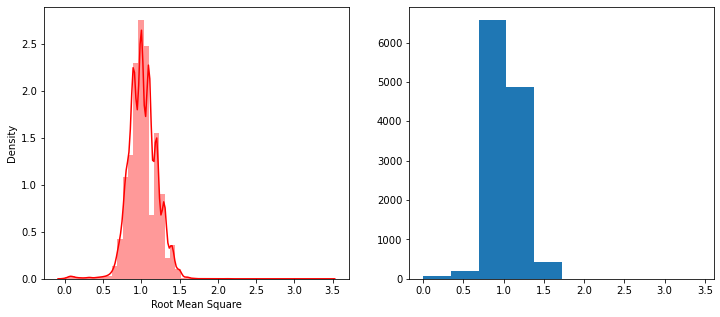

In [127]:
for feature in NaN_features:
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.distplot(df_train[feature], color='red')
    plt.subplot(1,2,2)
    plt.hist(df_train[feature])

*These above plotted feature has missing values. We need to impute the missing values in these columns. For the feature **Root mean square**, we can use **median** to impute*

In [128]:
df_train['Root Mean Square'] = df_train['Root Mean Square'].fillna(df_train['Root Mean Square'].mean())

In [129]:
df_train.isnull().sum()

Date                0
Time                0
Latitude            0
Longitude           0
Type                0
Depth               0
Magnitude Type      0
Root Mean Square    0
Source              0
Location Source     0
Magnitude Source    0
Status              0
Magnitude           0
dtype: int64

In [130]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16387 entries, 0 to 16387
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              16387 non-null  object 
 1   Time              16387 non-null  object 
 2   Latitude          16387 non-null  float64
 3   Longitude         16387 non-null  float64
 4   Type              16387 non-null  object 
 5   Depth             16387 non-null  float64
 6   Magnitude Type    16387 non-null  object 
 7   Root Mean Square  16387 non-null  float64
 8   Source            16387 non-null  object 
 9   Location Source   16387 non-null  object 
 10  Magnitude Source  16387 non-null  object 
 11  Status            16387 non-null  object 
 12  Magnitude         16387 non-null  float64
dtypes: float64(5), object(8)
memory usage: 1.8+ MB


#### Plotting a heatmap to see the correlation between the numerical features

<AxesSubplot:>

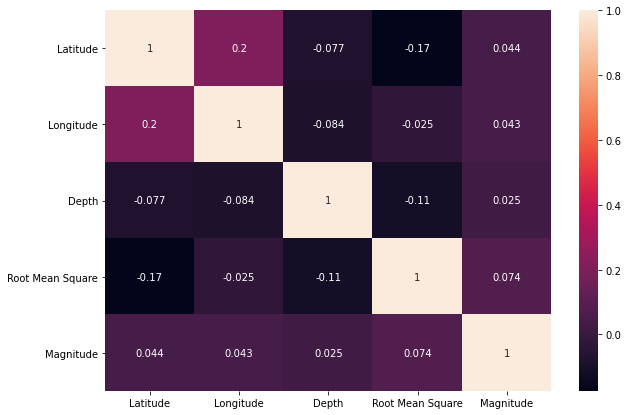

In [131]:
plt.figure(figsize=(10,7))
sns.heatmap(df_train.corr(), annot=True)

*We can see that the features are weakly correlated to one another*

Extracting the continuous features from the data

In [132]:
continuous_features = [feature for feature in df_train.select_dtypes(np.number).columns]

In [133]:
print(continuous_features)

['Latitude', 'Longitude', 'Depth', 'Root Mean Square', 'Magnitude']


Extracting the categorical features from the data

In [134]:
categorical_features = [feature for feature in df_train.select_dtypes(np.object).columns]

In [135]:
categorical_features

['Date',
 'Time',
 'Type',
 'Magnitude Type',
 'Source',
 'Location Source',
 'Magnitude Source',
 'Status']

#### Plotting boxplots and distplots to see the outliers and skewness for the numerical features

In [136]:
def create_boxplots(dataset, feature_list):
    for feature in feature_list:
        plt.figure(figsize=(5,5))
        dataset.boxplot(column=feature)
        plt.ylabel(feature)

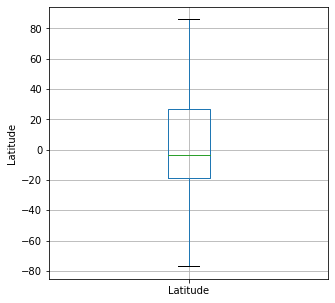

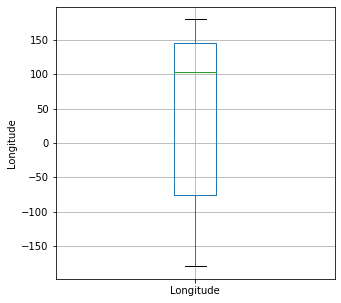

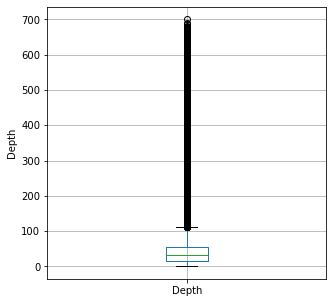

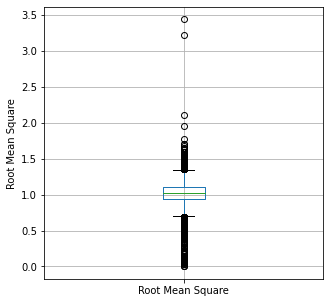

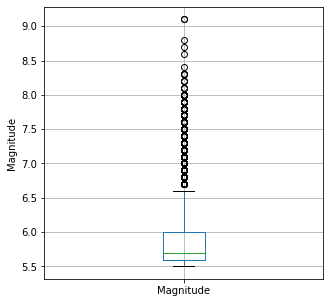

In [137]:
create_boxplots(df_train, continuous_features)

In [138]:
def remove_outliers(dataset, list_of_features):
    for feature in list_of_features:
        IQR = dataset[feature].quantile(0.75)-dataset[feature].quantile(0.25)
        lower_bridge = dataset[feature].quantile(0.25) - IQR*(1.5)
        upper_bridge = dataset[feature].quantile(0.75) + IQR*(1.5)
        dataset.loc[dataset[feature] >= upper_bridge, feature] = upper_bridge
        dataset.loc[dataset[feature] <= lower_bridge, feature] = lower_bridge

In [139]:
remove_outliers(df_train, continuous_features)

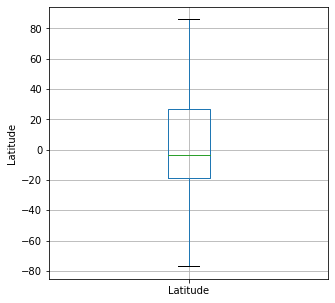

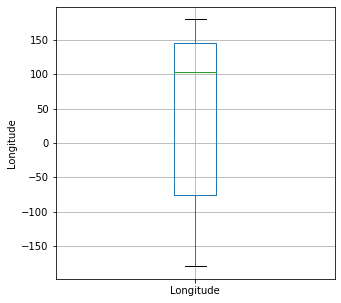

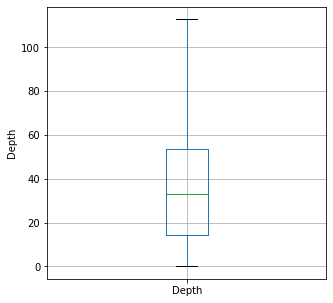

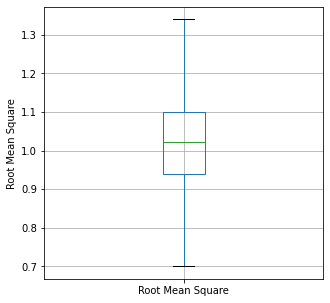

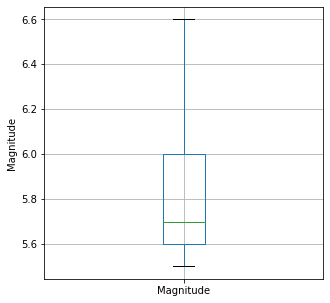

In [140]:
create_boxplots(df_train, continuous_features)

*The outliers have been removed*

#### Now we will check for multivariate outliers by plotting relplot

In [209]:
def create_relplot(dataset, list_of_features, target):
    for feature in list_of_features:
        for bivariate_feature in list_of_features:
            if bivariate_feature != feature:
                plt.figure(figsize=(10,10))
                sns.relplot(x=feature, y=bivariate_feature, data=dataset, hue=target)
                plt.show()

<Figure size 720x720 with 0 Axes>

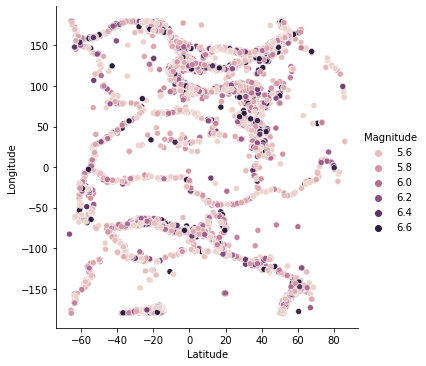

<Figure size 720x720 with 0 Axes>

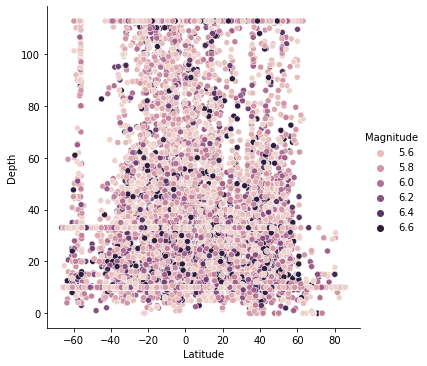

<Figure size 720x720 with 0 Axes>

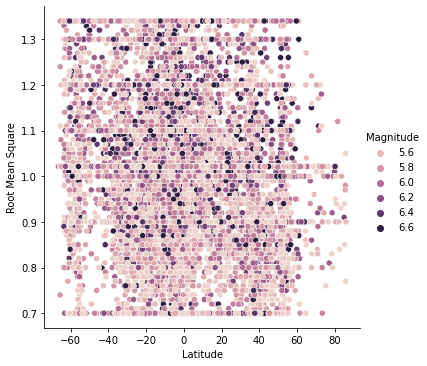

<Figure size 720x720 with 0 Axes>

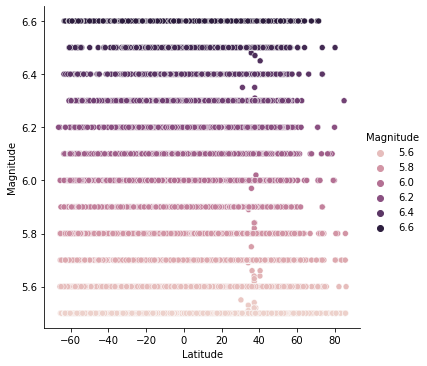

<Figure size 720x720 with 0 Axes>

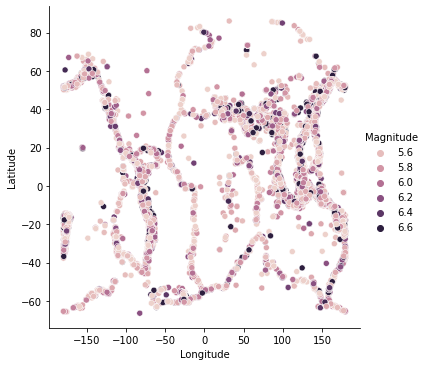

<Figure size 720x720 with 0 Axes>

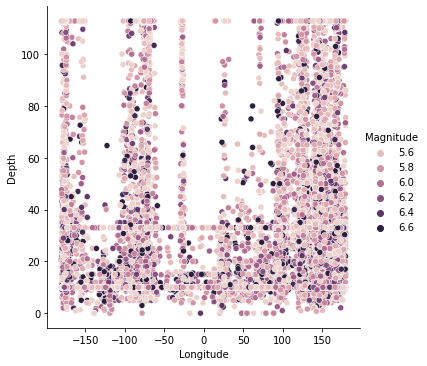

<Figure size 720x720 with 0 Axes>

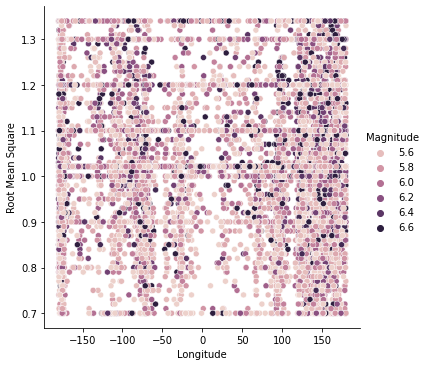

<Figure size 720x720 with 0 Axes>

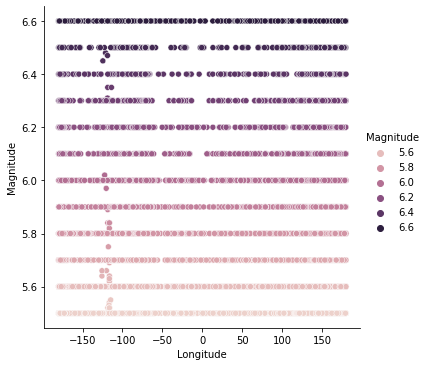

<Figure size 720x720 with 0 Axes>

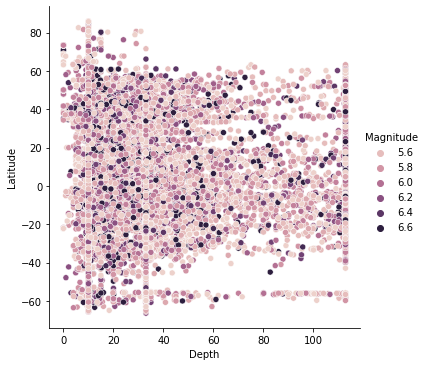

<Figure size 720x720 with 0 Axes>

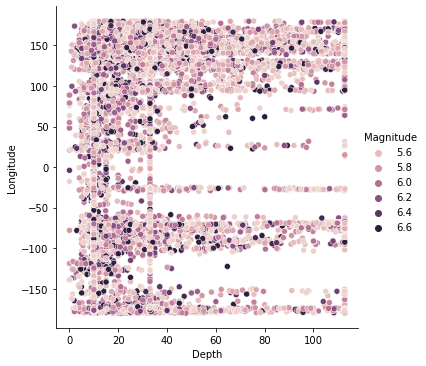

<Figure size 720x720 with 0 Axes>

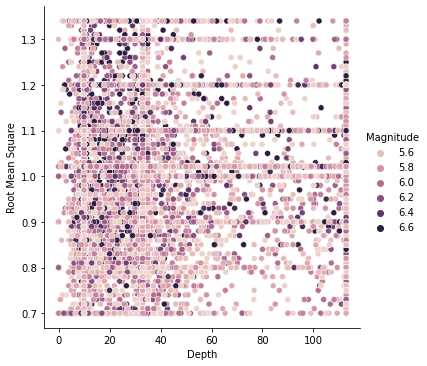

<Figure size 720x720 with 0 Axes>

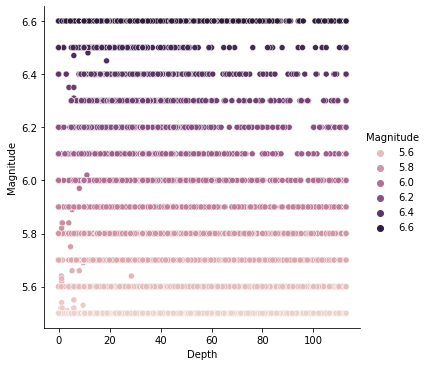

<Figure size 720x720 with 0 Axes>

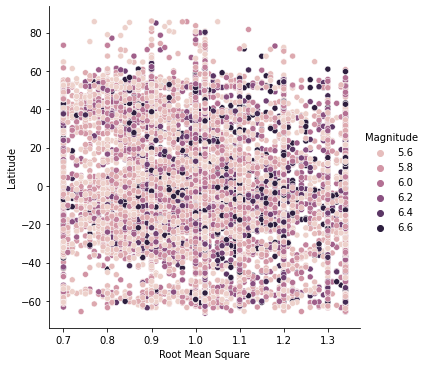

<Figure size 720x720 with 0 Axes>

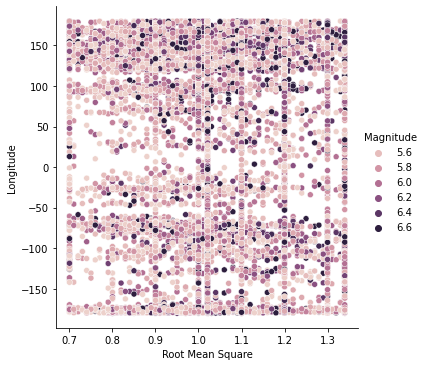

<Figure size 720x720 with 0 Axes>

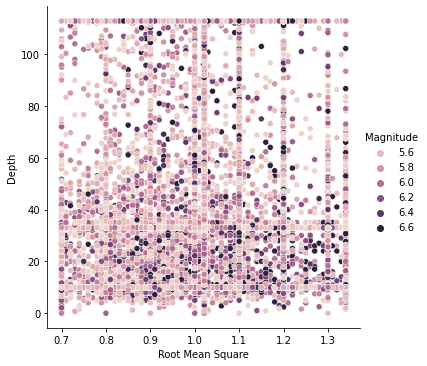

<Figure size 720x720 with 0 Axes>

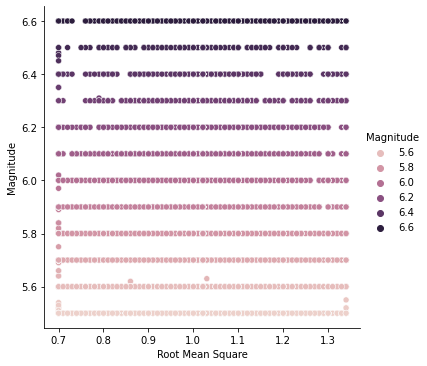

<Figure size 720x720 with 0 Axes>

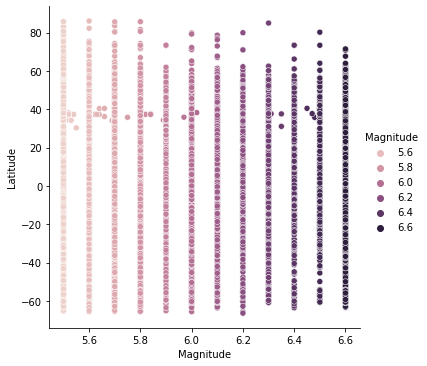

<Figure size 720x720 with 0 Axes>

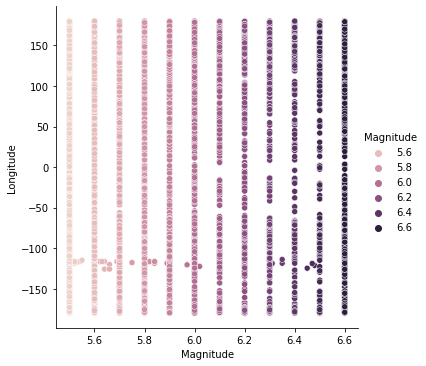

<Figure size 720x720 with 0 Axes>

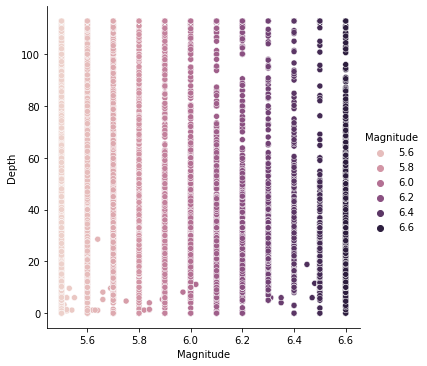

<Figure size 720x720 with 0 Axes>

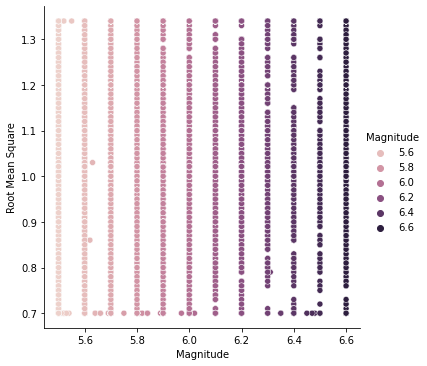

In [210]:
create_relplot(df_train, continuous_features, 'Magnitude')

In [144]:
df_train = df_train.drop(df_train[(df_train['Latitude'] < -70)].index)

In [145]:
df_train = df_train.drop(df_train[(df_train['Latitude'] < -60) & (df_train['Longitude'] > 100) & (df_train['Longitude'] < 125)].index)

In [185]:
df_train = df_train.drop(df_train[(df_train['Latitude'] > 70) & (df_train['Longitude'] > -150) & (df_train['Longitude'] < -50)].index)

In [192]:
df_train = df_train.drop(df_train[(df_train['Latitude'] > 75) & (df_train['Root Mean Square'] > 1.15)].index)

*We have removed the multivariate outliers from the dataset*

In [212]:
df_train.head()

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude Type,Root Mean Square,Source,Location Source,Magnitude Source,Status,Magnitude
0,11/22/2008,16:01:02,-4.348,101.259,Earthquake,24.0,MWC,1.24000,US,US,US,Reviewed,6.3
1,9/17/2012,20:07:54,-5.687,150.119,Earthquake,85.0,MWB,1.14000,US,US,US,Reviewed,5.5
2,1/6/1975,19:09:52,29.233,130.336,Earthquake,41.0,MS,1.02132,US,US,US,Reviewed,5.8
3,5/3/1968,5:32:47,25.191,124.636,Earthquake,97.4,MW,1.02132,ISCGEM,ISCGEM,ISCGEM,Automatic,5.7
4,4/23/1991,2:48:59,-2.759,134.432,Earthquake,10.3,MB,1.00000,US,US,US,Reviewed,5.8


#### Applying square root transformation to treat skewness

In [213]:
from scipy.stats import skew

In [214]:
for feature in continuous_features:
    print(feature, " ", skew(df_train[feature]))

Latitude   0.09796129230520882
Longitude   -0.6018873421302847
Depth   1.070076809784225
Root Mean Square   0.14037630227772532
Magnitude   0.9114765981429243


In [215]:
def create_histograms_distplots(dataset, feature_list):
    for feature in feature_list:
        plt.figure(figsize=(8,8))
        plt.subplot(2,2,1)
        plt.hist(dataset[feature].dropna())
        plt.xlabel(feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.subplot(2,2,2)
        sns.distplot(dataset[feature])
        plt.xlabel(feature)
        plt.show()

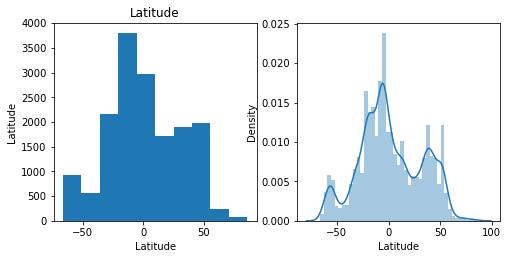

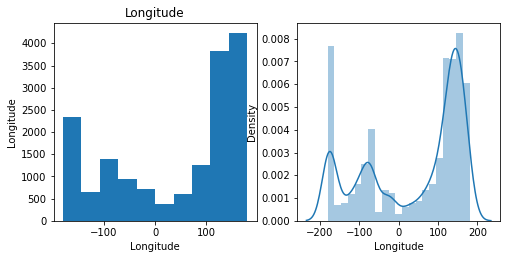

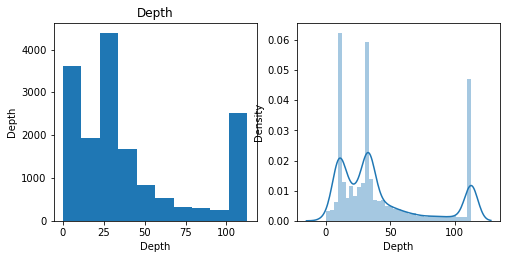

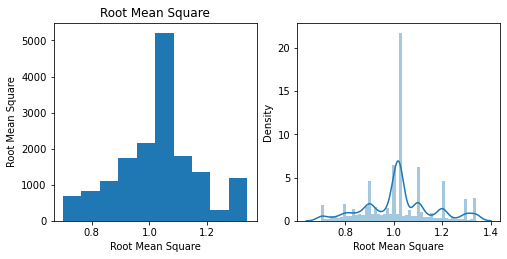

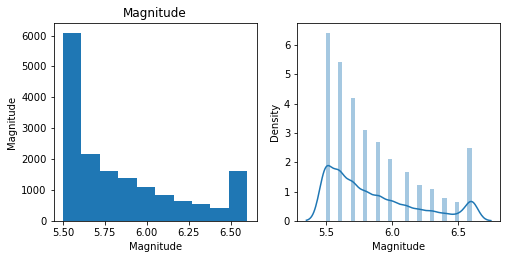

In [216]:
create_histograms_distplots(df_train, continuous_features)

In [53]:
skewed_features = ['Depth', 'Depth Error', 'Azimuthal Gap']
for feature in skewed_features:
    df[feature] = np.sqrt(df[feature])

In [54]:
for feature in numerical_features:
    print(feature, " ", skew(df[feature]))

Latitude   0.2913941577870602
Longitude   -0.7480687372546015
Depth   1.0411349155275293
Depth Error   1.8022850778102535
Depth Seismic Stations   0.6752106073000288
Magnitude   1.285654655745157
Azimuthal Gap   0.5835782959046166
Root Mean Square   0.23342459565196824


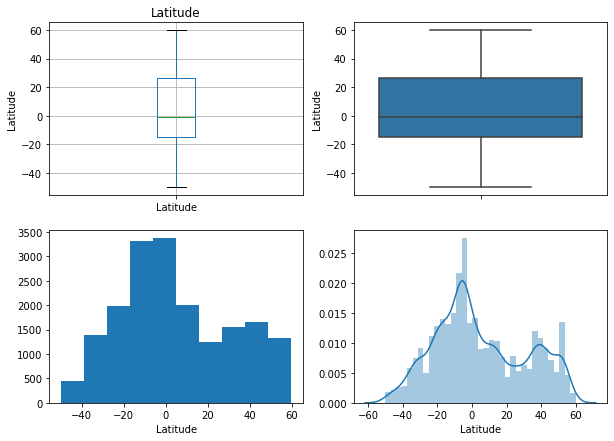

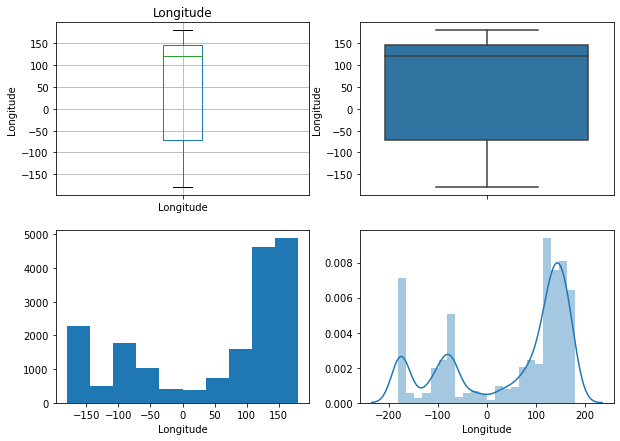

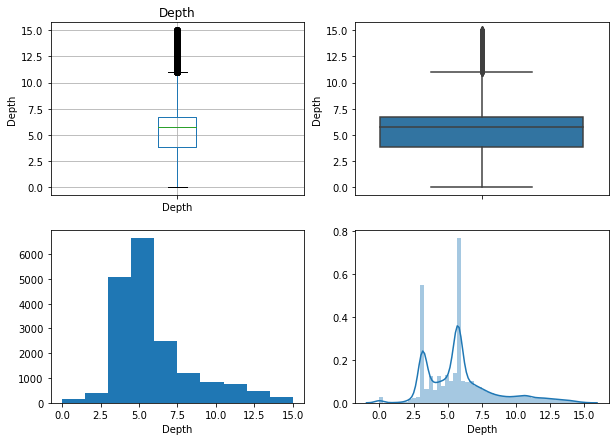

C:\Users\nipung\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


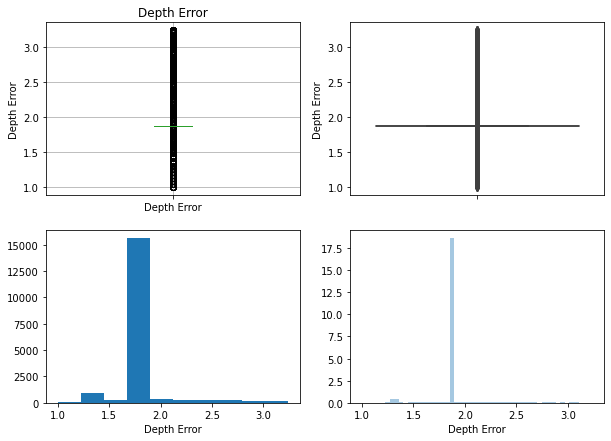

C:\Users\nipung\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


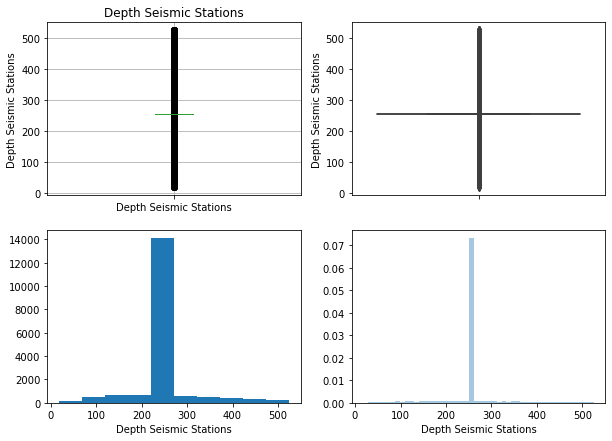

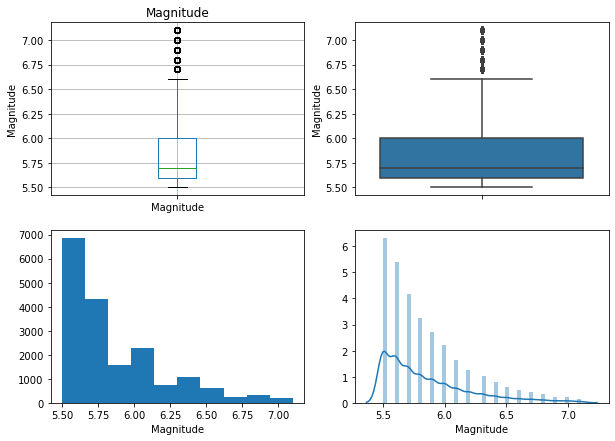

C:\Users\nipung\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


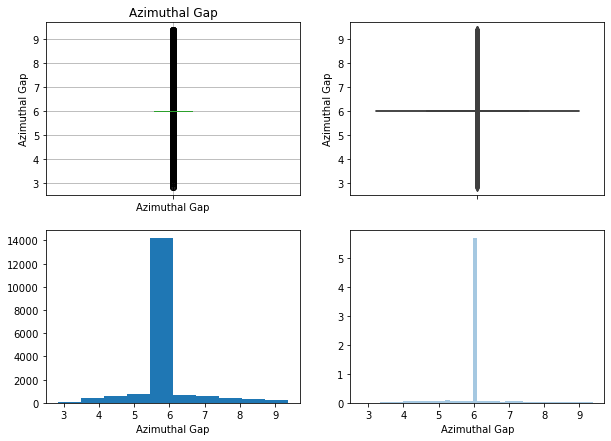

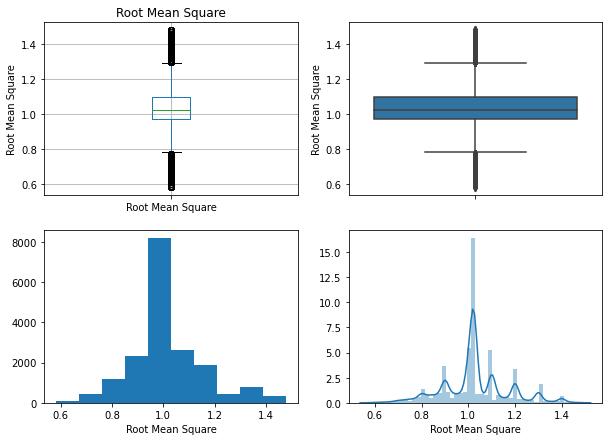

In [55]:
create_boxplots_distplots(df)

*Skewness has been handled*

In [56]:
df.head(10)

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Azimuthal Gap,Root Mean Square,Source,Location Source,Magnitude Source,Status
0,1/2/1965,13:44:18,19.246,145.616,Earthquake,11.471704,1.870829,255.0,6.0,MW,6.0,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic
1,1/4/1965,11:29:49,1.863,127.352,Earthquake,8.944272,1.870829,255.0,5.8,MW,6.0,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic
2,1/5/1965,18:05:58,-20.579,-173.972,Earthquake,4.472136,1.870829,255.0,6.2,MW,6.0,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic
4,1/9/1965,13:32:50,11.938,126.427,Earthquake,3.872983,1.870829,255.0,5.8,MW,6.0,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic
5,1/10/1965,13:36:32,-13.405,166.629,Earthquake,5.916080,1.870829,255.0,6.7,MW,6.0,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic
6,1/12/1965,13:32:25,27.357,87.867,Earthquake,4.472136,1.870829,255.0,5.9,MW,6.0,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic
7,1/15/1965,23:17:42,-13.309,166.212,Earthquake,5.916080,1.870829,255.0,6.0,MW,6.0,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic
12,1/29/1965,9:35:30,54.636,161.703,Earthquake,7.416198,1.870829,255.0,5.5,MW,6.0,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic
14,2/2/1965,15:56:51,37.523,73.251,Earthquake,3.872983,1.870829,255.0,6.0,MW,6.0,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic
17,2/4/1965,6:04:59,51.639,175.055,Earthquake,5.477226,1.870829,255.0,6.0,MW,6.0,1.022784,ISCGEMSUP,ISCGEM,ISCGEM,Automatic


#### Analysing categorical features

In [57]:
categorical_features = df.select_dtypes(np.object).columns
categorical_features

Index(['Date', 'Time', 'Type', 'Magnitude Type', 'Source', 'Location Source',
       'Magnitude Source', 'Status'],
      dtype='object')

In [58]:
for feature in categorical_features:
    if feature == 'Date':
        pass
    elif feature == 'Time':
        pass
    else:
        print("Feature : ", feature)
        print(df[feature].value_counts())
        print()

Feature :  Type
Earthquake           18117
Nuclear Explosion      136
Explosion                3
Rock Burst               1
Name: Type, dtype: int64

Feature :  Magnitude Type
MW     6326
MWC    4198
MB     3065
MWB    1756
MS     1488
MWW    1405
MWR      17
ML        2
Name: Magnitude Type, dtype: int64

Feature :  Source
US           15970
ISCGEM        2144
ISCGEMSUP       94
GCMT            47
CI               1
NC               1
Name: Source, dtype: int64

Feature :  Location Source
US        15756
ISCGEM     2238
GCMT         47
GUC          42
PGC          17
AEIC         16
WEL          14
ISK          13
HVO          12
UNM          12
AGS          11
ATH           9
SPE           9
H             7
TEH           6
US_WEL        4
CASC          4
THR           3
NC            3
RSPR          3
THE           3
ROM           3
G             2
AK            2
JMA           2
AEI           2
B             2
TUL           2
LIM           1
OTT           1
BRK           1
U        

*We can consider the Nuclear explosion and Explosion as 1 single category*

In [59]:
df["Type"].replace({"Nuclear Explosion": "Explosion"}, inplace=True)

*For the above features, we will remove the categories having counts less than 4*

In [60]:
for feature in categorical_features:
    if feature == 'Date':
        pass
    elif feature == 'Time':
        pass
    elif feature == 'Location Source':
        pass
    else:
        x = df[feature].value_counts().keys().tolist()
        y = df[feature].value_counts().tolist()
        for i in range(len(x)):
            if y[i] < 4:
                index_names = df[df[feature] == x[i]].index
                df.drop(index_names, inplace = True)
        x = None
        y = None

In [61]:
for feature in categorical_features:
    if feature == 'Date':
        pass
    elif feature == 'Time':
        pass
    else:
        print("Feature : ", feature)
        print(df[feature].value_counts())
        print()

Feature :  Type
Earthquake    18103
Explosion       139
Name: Type, dtype: int64

Feature :  Magnitude Type
MW     6323
MWC    4196
MB     3064
MWB    1756
MS     1488
MWW    1405
MWR      10
Name: Magnitude Type, dtype: int64

Feature :  Source
US           15957
ISCGEM        2144
ISCGEMSUP       94
GCMT            47
Name: Source, dtype: int64

Feature :  Location Source
US        15746
ISCGEM     2238
GCMT         47
GUC          42
PGC          17
AEIC         16
WEL          14
ISK          13
HVO          12
UNM          12
AGS          11
SPE           9
ATH           9
H             7
TEH           6
CASC          4
US_WEL        4
THR           3
RSPR          3
ROM           3
THE           3
AK            2
TUL           2
G             2
AEI           2
NC            2
UCR           1
TAP           1
BEO           1
CSEM          1
U             1
BOU           1
SJA           1
OTT           1
SLC           1
LIM           1
CAR           1
BRK           1
JMA           1

*We can group the categories of **Location Source** column for which the count is less than 29*

In [62]:
x = df['Location Source'].value_counts().keys().tolist()
y = df['Location Source'].value_counts().tolist()
for i in range(len(x)):
    if y[i] < 29:
        df['Location Source'].replace({x[i]: "Other"}, inplace=True)

In [63]:
df['Location Source'].value_counts()

US        15746
ISCGEM     2238
Other       169
GCMT         47
GUC          42
Name: Location Source, dtype: int64

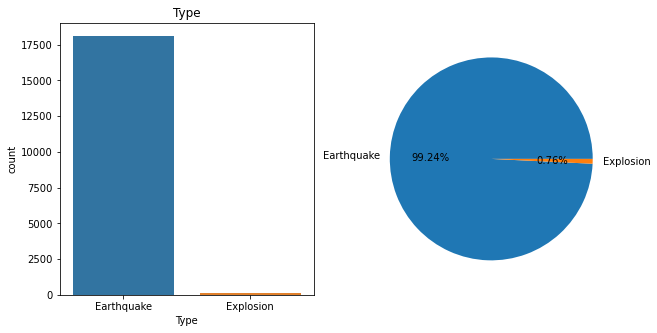

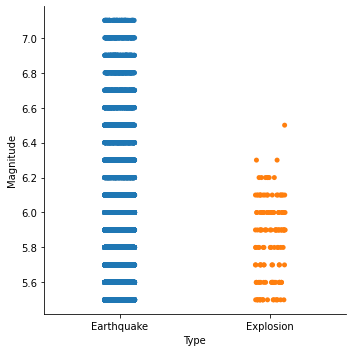

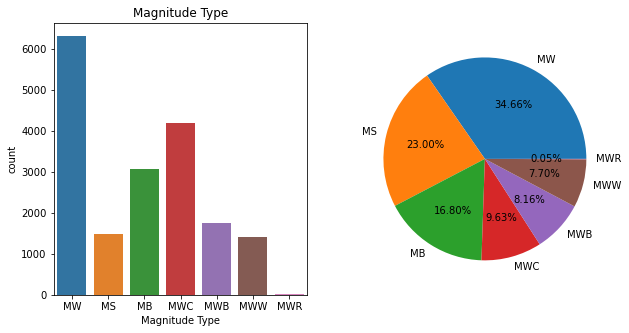

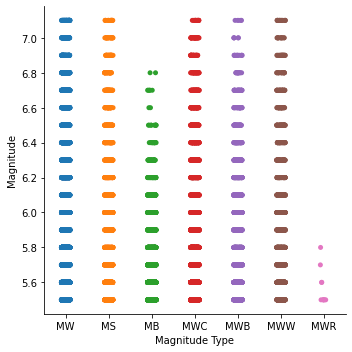

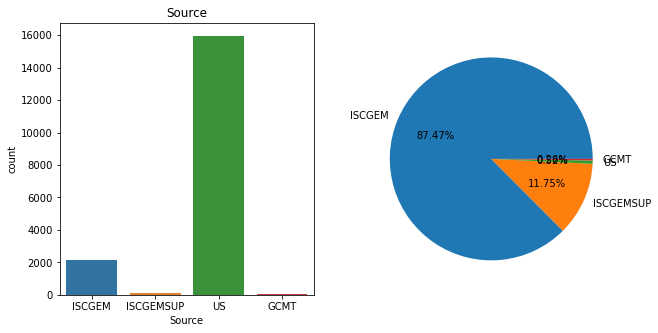

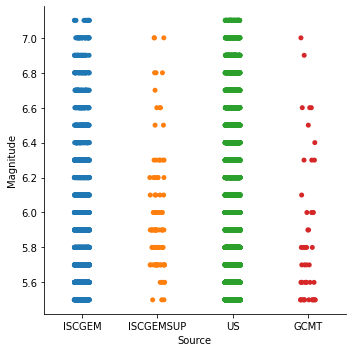

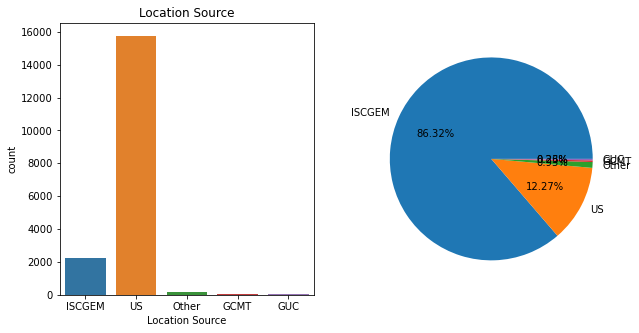

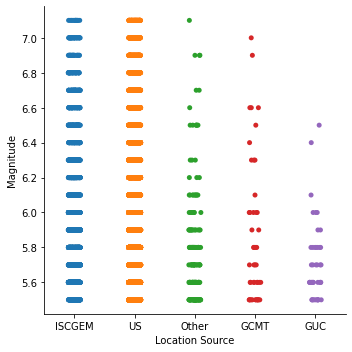

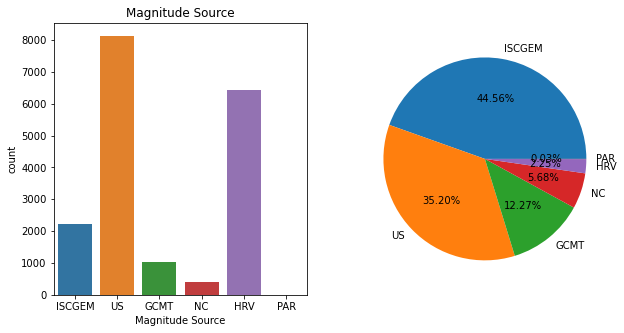

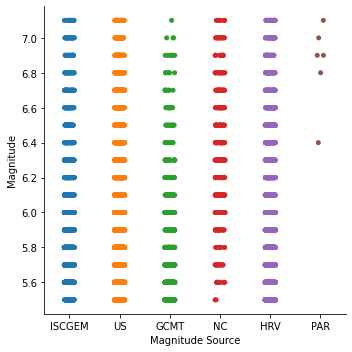

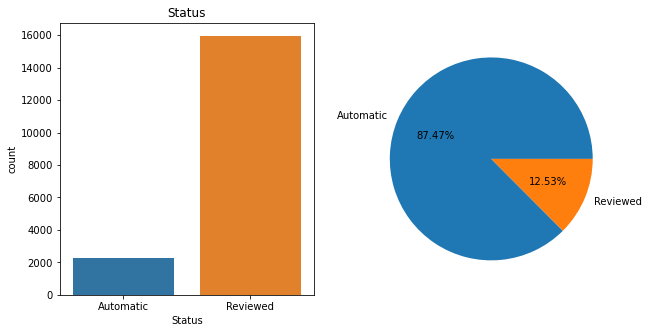

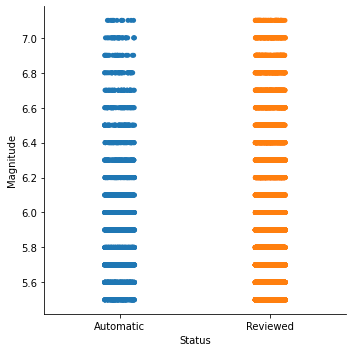

In [64]:
for feature in categorical_features:
    if feature == 'Date':
        pass
    elif feature == 'Time':
        pass
    else:
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        sns.countplot(feature, data=df)
        plt.title(feature)
        plt.subplot(1,2,2)
        plt.pie(df[feature].value_counts(), labels=df[feature].unique(), autopct='%0.2f%%')
        plt.show()
        sns.catplot(x=feature, y='Magnitude', data=df)
        plt.show()        

*From the plots, we can observe that most of the earthquakes are genuine earthquakes whereas very few earthquakes are due to explosions. 99.24% of the earthquakes are genuine earthquakes whereas 0.76% earthquakes are due to explosions. the magnitude of earthquake ranges from 2.35 to approx 2.70 for genuine earthquakes whereas the magnitude varies from 2.35 to 2.55 in the case of explosions*

*Magnitude Type glossary :*

     MWC : centroid
     MWW : (Moment W-phase)(generic notation Mw)
     MB : short-period body wave
     MWB : body wave
     MS : 20 sec surface wave
     MWW : Moment W-phase)(generic notation Mw
     MWR : regional
     ML : local

#### Working with Date and Time values

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18242 entries, 0 to 23410
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    18242 non-null  object 
 1   Time                    18242 non-null  object 
 2   Latitude                18242 non-null  float64
 3   Longitude               18242 non-null  float64
 4   Type                    18242 non-null  object 
 5   Depth                   18242 non-null  float64
 6   Depth Error             18242 non-null  float64
 7   Depth Seismic Stations  18242 non-null  float64
 8   Magnitude               18242 non-null  float64
 9   Magnitude Type          18242 non-null  object 
 10  Azimuthal Gap           18242 non-null  float64
 11  Root Mean Square        18242 non-null  float64
 12  Source                  18242 non-null  object 
 13  Location Source         18242 non-null  object 
 14  Magnitude Source        18242 non-null

*Date and Time columns are categorical features. We need to convert Date into datetime object*

In [66]:
df["Date"].replace({"1985-04-28T02:53:41.530Z": "4/28/1985"}, inplace=True)

In [67]:
df['Day'] = pd.to_datetime(df.Date, format="%m/%d/%Y").dt.day

In [68]:
df['Month'] = pd.to_datetime(df.Date, format="%m/%d/%Y").dt.month

In [69]:
df['Year'] = pd.to_datetime(df.Date, format="%m/%d/%Y").dt.year

In [70]:
df['Year'].value_counts()

2011    499
1995    478
1996    458
2000    448
1990    428
1994    428
1992    426
2010    417
2007    405
1976    400
1987    397
1988    390
2009    389
1985    384
1989    378
1986    378
1983    378
1997    377
1977    373
1984    369
2001    368
1993    366
2005    362
1999    360
2016    349
2014    349
1975    348
1991    346
1978    342
2008    341
1971    340
2004    339
2002    337
1973    331
1972    327
2015    324
2013    311
2003    310
1998    306
1974    305
2006    304
1980    300
1970    300
1982    298
1979    296
1965    286
1969    285
1981    270
1968    262
2012    251
1967    222
1966    207
Name: Year, dtype: int64

*We can drop the Date column*

In [71]:
df.drop(['Date'], axis=1, inplace=True)

In [72]:
df["Time"].replace({"1975-02-23T02:58:41.000Z": "2:58:41"}, inplace=True)

In [73]:
df['Hours'] = pd.to_datetime(df['Time'], utc=True).dt.hour

In [74]:
df['Minutes'] = pd.to_datetime(df['Time'], utc=True).dt.minute

In [75]:
df['Seconds'] = pd.to_datetime(df['Time'], utc=True).dt.second

*We can drop the Date column*

In [76]:
df.drop(['Time'], axis=1, inplace=True)

In [77]:
df.head(5)

,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Azimuthal Gap,Root Mean Square,Source,Location Source,Magnitude Source,Status,Day,Month,Year,Hours,Minutes,Seconds
0,19.246,145.616,Earthquake,11.471704,1.870829,255.0,6.0,MW,6.0,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic,2,1,1965,13,44,18
1,1.863,127.352,Earthquake,8.944272,1.870829,255.0,5.8,MW,6.0,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic,4,1,1965,11,29,49
2,-20.579,-173.972,Earthquake,4.472136,1.870829,255.0,6.2,MW,6.0,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic,5,1,1965,18,5,58
4,11.938,126.427,Earthquake,3.872983,1.870829,255.0,5.8,MW,6.0,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic,9,1,1965,13,32,50
5,-13.405,166.629,Earthquake,5.916080,1.870829,255.0,6.7,MW,6.0,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic,10,1,1965,13,36,32


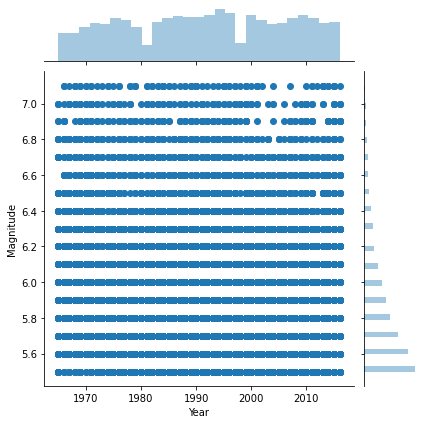

In [78]:
sns.jointplot(y=df['Magnitude'], x=df['Year'], data=df)

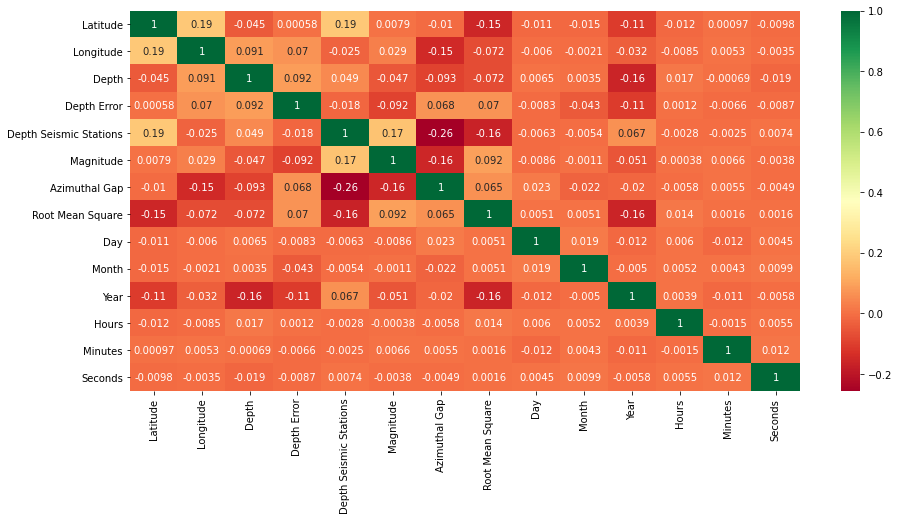

In [79]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18242 entries, 0 to 23410
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Latitude                18242 non-null  float64
 1   Longitude               18242 non-null  float64
 2   Type                    18242 non-null  object 
 3   Depth                   18242 non-null  float64
 4   Depth Error             18242 non-null  float64
 5   Depth Seismic Stations  18242 non-null  float64
 6   Magnitude               18242 non-null  float64
 7   Magnitude Type          18242 non-null  object 
 8   Azimuthal Gap           18242 non-null  float64
 9   Root Mean Square        18242 non-null  float64
 10  Source                  18242 non-null  object 
 11  Location Source         18242 non-null  object 
 12  Magnitude Source        18242 non-null  object 
 13  Status                  18242 non-null  object 
 14  Day                     18242 non-null

In [81]:
df.describe()

,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Azimuthal Gap,Root Mean Square,Day,Month,Year,Hours,Minutes,Seconds
count,18242.000000,18242.000000,18242.000000,18242.000000,18242.000000,18242.000000,18242.000000,18242.000000,18242.000000,18242.000000,18242.000000,18242.000000,18242.000000,18242.000000
mean,4.851559,49.010888,5.910274,1.879010,257.099825,5.849161,6.007397,1.028363,15.652176,6.531411,1991.494518,11.399353,29.310712,29.709242
std,26.225374,121.834847,2.582679,0.233772,63.777417,0.352459,0.740200,0.138365,8.667389,3.454835,14.399863,6.888994,17.386090,17.424682
min,-49.958500,-179.985000,0.000000,1.000000,18.000000,5.500000,2.828427,0.580000,1.000000,1.000000,1965.000000,0.000000,0.000000,0.000000
25%,-14.910750,-71.975050,3.872983,1.870829,255.000000,5.600000,6.000000,0.970000,8.000000,4.000000,1979.000000,5.000000,14.000000,15.000000
50%,-1.020500,120.180500,5.744563,1.870829,255.000000,5.700000,6.000000,1.022784,16.000000,7.000000,1992.000000,11.000000,29.000000,30.000000
75%,26.482250,146.297000,6.745369,1.870829,255.000000,6.000000,6.000000,1.100000,23.000000,10.000000,2004.000000,17.000000,44.000000,45.000000
max,59.804000,179.989000,15.000000,3.240370,525.000000,7.100000,9.370165,1.480000,31.000000,12.000000,2016.000000,23.000000,59.000000,59.000000


In [82]:
df.to_csv('file6.csv')

In [83]:
df = pd.read_csv('file6.csv', index_col='Unnamed: 0')

#### Encoding of categorical variables

In [84]:
df = pd.get_dummies(df, drop_first=True)

In [85]:
pd.set_option('display.max_columns', None)

In [86]:
m = df.Magnitude
m

0        6.0
1        5.8
2        6.2
4        5.8
5        6.7
        ... 
23400    5.9
23401    6.0
23402    5.8
23405    5.6
23410    6.3
Name: Magnitude, Length: 18242, dtype: float64

In [87]:
df.drop(['Magnitude'], axis=1, inplace=True)

In [88]:
df['Magnitude'] = m

In [89]:
df.head(5)

,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Azimuthal Gap,Root Mean Square,Day,Month,Year,Hours,Minutes,Seconds,Type_Explosion,Magnitude Type_MS,Magnitude Type_MW,Magnitude Type_MWB,Magnitude Type_MWC,Magnitude Type_MWR,Magnitude Type_MWW,Source_ISCGEM,Source_ISCGEMSUP,Source_US,Location Source_GUC,Location Source_ISCGEM,Location Source_Other,Location Source_US,Magnitude Source_HRV,Magnitude Source_ISCGEM,Magnitude Source_NC,Magnitude Source_PAR,Magnitude Source_US,Status_Reviewed,Magnitude
0,19.246,145.616,11.471704,1.870829,255.0,6.0,1.022784,2,1,1965,13,44,18,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,6.0
1,1.863,127.352,8.944272,1.870829,255.0,6.0,1.022784,4,1,1965,11,29,49,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,5.8
2,-20.579,-173.972,4.472136,1.870829,255.0,6.0,1.022784,5,1,1965,18,5,58,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,6.2
4,11.938,126.427,3.872983,1.870829,255.0,6.0,1.022784,9,1,1965,13,32,50,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,5.8
5,-13.405,166.629,5.916080,1.870829,255.0,6.0,1.022784,10,1,1965,13,36,32,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,6.7


#### Splitting the dataset

In [90]:
X = df.iloc[:, :-1]

In [91]:
y = df.iloc[:,-1]

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=124)

In [93]:
X_train.shape

(12769, 33)

In [94]:
X_test.shape

(5473, 33)

In [95]:
y_train.shape

(12769,)

In [96]:
y_test.shape

(5473,)

#### Model Building

*We will create a Linear Regression model*

In [97]:
from sklearn.linear_model import LinearRegression

In [98]:
regressor = LinearRegression()

In [99]:
#Fitting the training data on the Linear Regression model
regressor.fit(X_train, y_train)

LinearRegression()

In [100]:
#Intercept of the best fit line of regression
print("Intercept : ", regressor.intercept_)

Intercept :  11.407845684693603


In [101]:
regressor.coef_

array([-4.00714538e-04,  1.16843825e-04, -5.45923179e-03, -1.03360947e-01,
        8.21426450e-04, -5.04974869e-02,  2.88595709e-01, -1.26080905e-04,
       -2.93791960e-04, -2.94238572e-03, -1.24041962e-04,  2.49338212e-04,
       -1.62210312e-04,  1.42595683e-01,  2.48078129e-01,  2.86989655e-01,
        2.56017939e-01,  3.41572720e-01,  1.23639013e-01,  2.73137417e-01,
        2.51262593e-03,  3.74739480e-02, -3.09096187e-02, -6.07055869e-02,
        3.99865740e-02, -1.89299233e-02,  4.87258915e-02, -4.26384463e-03,
        3.99865740e-02,  5.05250935e-01,  9.64044704e-01,  1.50083355e-01,
       -3.09096187e-02])

In [102]:
y_pred = regressor.predict(X_test)

In [103]:
from sklearn import metrics

In [104]:
print("Mean absolute error : ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean squared error : ", metrics.mean_squared_error(y_test, y_pred))
print("Root mean squared error : ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean absolute error :  0.25059181034041045
Mean squared error :  0.10731463977800935
Root mean squared error :  0.32758913257006766


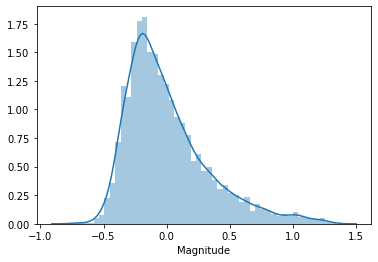

In [105]:
sns.distplot(y_test-y_pred)

The distplot of the difference the y_test and y_pred is almost a Gaussian distribution

In [106]:
y_pred[2109], y_test.tolist()[2109]

(5.761831141604073, 5.5)

In [107]:
y_pred[109], y_test.tolist()[109]

(5.743083518252261, 5.5)

In [108]:
y_pred[1109], y_test.tolist()[1109]

(5.971926357156031, 5.7)

The predicted and the actual values are very close to each other

*Now we will build RandomForestRegressor model*

In [109]:
from sklearn.ensemble import RandomForestRegressor

We will perform hyperparameter tuning for Random Forest Regressor model

In [110]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [111]:
#Number of features to consider at every split
max_features = ['auto', 'sqrt']
#Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start = 5, stop = 30, num = 6)]
#Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
#Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [112]:
from sklearn.model_selection import RandomizedSearchCV

In [113]:
random_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

random_grid

{'n_estimators': [100,
  200,
  300,
  400,
  500,
  600,
  700,
  800,
  900,
  1000,
  1100,
  1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 10, 15, 20, 25, 30],
 'min_samples_split': [2, 5, 10, 15, 100],
 'min_samples_leaf': [1, 2, 5, 10]}

In [114]:
rfc = RandomForestRegressor()
rsc = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, scoring = 'neg_mean_squared_error', n_iter = 10, cv = 5, random_state = 42, verbose = 2, n_jobs=1)

In [115]:
rsc.fit(X_train, y_train)

In [116]:
prediction = rsc.predict(X_test)
prediction

'\nprediction = rsc.predict(X_test)\nprediction\n'

In [117]:
y_test

In [118]:
rsc.best_params_

In [119]:
plt.figure(figsize = (5,5))
sns.distplot(y_test-prediction)
plt.show()

'\nplt.figure(figsize = (5,5))\nsns.distplot(y_test-prediction)\nplt.show()\n'

In [120]:
print("Mean absolute error : ", metrics.mean_absolute_error(y_test, prediction))
print("Mean squared error : ", metrics.mean_squared_error(y_test, prediction))
print("Root mean squared error : ", np.sqrt(metrics.mean_squared_error(y_test, prediction)))

'\nprint("Mean absolute error : ", metrics.mean_absolute_error(y_test, prediction))\nprint("Mean squared error : ", metrics.mean_squared_error(y_test, prediction))\nprint("Root mean squared error : ", np.sqrt(metrics.mean_squared_error(y_test, prediction)))\n'

In [121]:
prediction[2109], y_test.tolist()[2109]

In [122]:
prediction[1109], y_test.tolist()[1109]

In [123]:
prediction[709], y_test.tolist()[709]